# Visualization
- author: Hamid Ali Syed
- email: hamidsyed37[at]gmail[dot]com

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import hvplot.pandas
import geopandas as gpd
import geoviews as gv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import display

## Read the data

In [2]:
df = pd.read_csv("IMD_Radar_Sites_2022.csv").drop(["Unnamed: 0", "State"], axis=1)

In [3]:
counts = df.groupby('Band').agg(count=('Band', 'size'))
display(counts)

# Print the total number of radars
total_radars = counts.sum()
print(f"Total number of radars: {total_radars[0]}")

count
Band       
C         4
S        22
X         7

Total number of radars: 33


In [4]:
import shapely.geometry as sgeom
import numpy as np
from cartopy.geodesic import Geodesic
def draw_circle_on_map(df):
    gd = Geodesic()
    geoms = []
    for _, row in df.iterrows():
        lon, lat = row['Longitude'], row['Latitude']
        if row['Band'] == "X":
            radius=100e3
        else:
            radius=250e3
        cp = gd.circle(lon=lon, lat=lat, radius=radius)
        geoms.append(sgeom.Polygon(cp))
    gdf = gpd.GeoDataFrame(df, geometry=geoms)
    return gdf

In [5]:
gdf = draw_circle_on_map(df)
gdf

Site   Latitude  Longitude Band  \
0             Srinagar  34.083656  74.797371    X   
1                Jammu  32.926600  74.857000    X   
2                  Jot  32.486800  76.059300    X   
3                Kufri  31.097800  77.267800    X   
4               Murari  30.789800  78.917850    X   
5           Surkandaji  30.411400  78.288500    X   
6              Patiala  30.339800  76.386900    S   
7           Mukteshwar  29.460400  79.655800    X   
8                Palam  28.590100  77.088800    S   
9                Delhi  28.563200  77.191200    C   
10           Mohanbari  27.472800  94.912000    S   
11              Jaipur  26.912400  75.787300    C   
12             Lucknow  26.846700  80.946200    S   
13               Patna  25.594100  85.137600    S   
14               Sohra  25.270200  91.732300    S   
15            Agartala  23.831500  91.286800    S   
16              Bhopal  23.259900  77.412600    S   
17                Bhuj  23.242000  69.666900    S   
18             Kolkata  22.572600  88.363900    S   
19              Nagpur  21.145800  79.088200    S   
20             Paradip  20.316600  86.611400    S   
21            Veravali  19.734300  72.876300    C   
22            Gopalpur  19.264700  84.862000    S   
23              Mumbai  19.076000  72.877700    S   
24       Visakhapatnam  17.686800  83.218500    S   
25           Hyderabad  17.385000  78.486700    S   
26       Machilipatnam  16.190500  81.136200    S   
27              Panaji  15.490900  73.827800    S   
28         Sriharikota  13.725900  80.226600    S   
29             Chennai  13.082700  80.270700    S   
30            Karaikal  10.925400  79.838000    S   
31               Kochi   9.931200  76.267300    S   
32  Thiruvananthapuram   8.524100  76.936600    C   

                                             geometry  
0   POLYGON ((74.79737 34.98511, 74.75915 34.98455...  
1   POLYGON ((74.85700 33.82822, 74.81930 33.82767...  
2   POLYGON ((76.05930 33.38849, 76.02179 33.38793...  
3   POLYGON ((77.26780 31.99968, 77.23087 31.99913...  
4   POLYGON ((78.91785 31.69173, 78.88104 31.69117...  
5   POLYGON ((78.28850 31.31338, 78.25184 31.31283...  
6   POLYGON ((76.38690 32.59454, 76.29399 32.59313...  
7   POLYGON ((79.65580 30.36251, 79.61950 30.36196...  
8   POLYGON ((77.08880 30.84545, 76.99762 30.84404...  
9   POLYGON ((77.19120 30.81855, 77.10004 30.81715...  
10  POLYGON ((94.91200 29.72852, 94.82184 29.72712...  
11  POLYGON ((75.78730 29.16831, 75.69764 29.16690...  
12  POLYGON ((80.94620 29.10263, 80.85659 29.10123...  
13  POLYGON ((85.13760 27.85043, 85.04904 27.84903...  
14  POLYGON ((91.73230 27.52664, 91.64400 27.52523...  
15  POLYGON ((91.28680 26.08838, 91.19961 26.08698...  
16  POLYGON ((77.41260 25.51695, 77.32583 25.51555...  
17  POLYGON ((69.66690 25.49906, 69.58014 25.49766...  
18  POLYGON ((88.36390 24.82985, 88.27761 24.82846...  
19  POLYGON ((79.08820 23.40346, 79.00287 23.40206...  
20  POLYGON ((86.61140 22.57449, 86.52658 22.57309...  
21  POLYGON ((72.87630 21.99234, 72.79183 21.99095...  
22  POLYGON ((84.86200 21.52287, 84.77781 21.52147...  
23  POLYGON ((72.87770 21.33421, 72.79362 21.33282...  
24  POLYGON ((83.21850 19.94536, 83.13518 19.94397...  
25  POLYGON ((78.48670 19.64363, 78.40353 19.64224...  
26  POLYGON ((81.13620 18.44941, 81.05363 18.44802...  
27  POLYGON ((73.82780 17.74996, 73.74555 17.74857...  
28  POLYGON ((80.22660 15.98533, 80.14511 15.98394...  
29  POLYGON ((80.27070 15.34225, 80.18947 15.34086...  
30  POLYGON ((79.83800 13.18533, 79.75754 13.18394...  
31  POLYGON ((76.26730 12.19129, 76.18715 12.18990...  
32  POLYGON ((76.93660 10.78438, 76.85684 10.78300...

In [6]:
points = df.hvplot.points(x='Longitude', y='Latitude', geo=True, color='Band',
                          alpha=0.7, coastline = True,
                 xlim=(df.Longitude.min()-5, df.Longitude.max()+3),
                 ylim=(df.Latitude.min()-3, df.Latitude.max()+3),
                 tiles='OpenTopoMap', frame_height=800, frame_width=650, hover_cols=['Site', 'Band'], value_label='Count')

# Create the circle plot
circles = gv.Polygons(data=gdf.geometry,).opts(color = "gray", fill_alpha=0.2, xlabel = "Longitude˚E", ylabel = "Latitude˚N",
                                               frame_height=800, frame_width=650)
# Overlay the circle plot on top of the point plot
plot = points * circles
# Show the plot
display(plot)

/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/miniconda3/envs/ds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/syed44/mi

:Overlay
   .Tiles.I     :Tiles   [x,y]
   .Points.I    :Points   [Longitude,Latitude]   (Band,Site)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]

In [7]:
import urllib.request
url = "https://raw.githubusercontent.com/syedhamidali/test_scripts/master/map_features.py"
urllib.request.urlretrieve(url, "map_features.py")
import map_features as mf

In [8]:
!git clone https://github.com/aman1chaudhary/India-Shapefiles.git

fatal: destination path 'India-Shapefiles' already exists and is not an empty directory.


In [9]:
india = gpd.read_file("India-Shapefiles/India Boundary/")
states = gpd.read_file("India-Shapefiles/India States Boundary/")

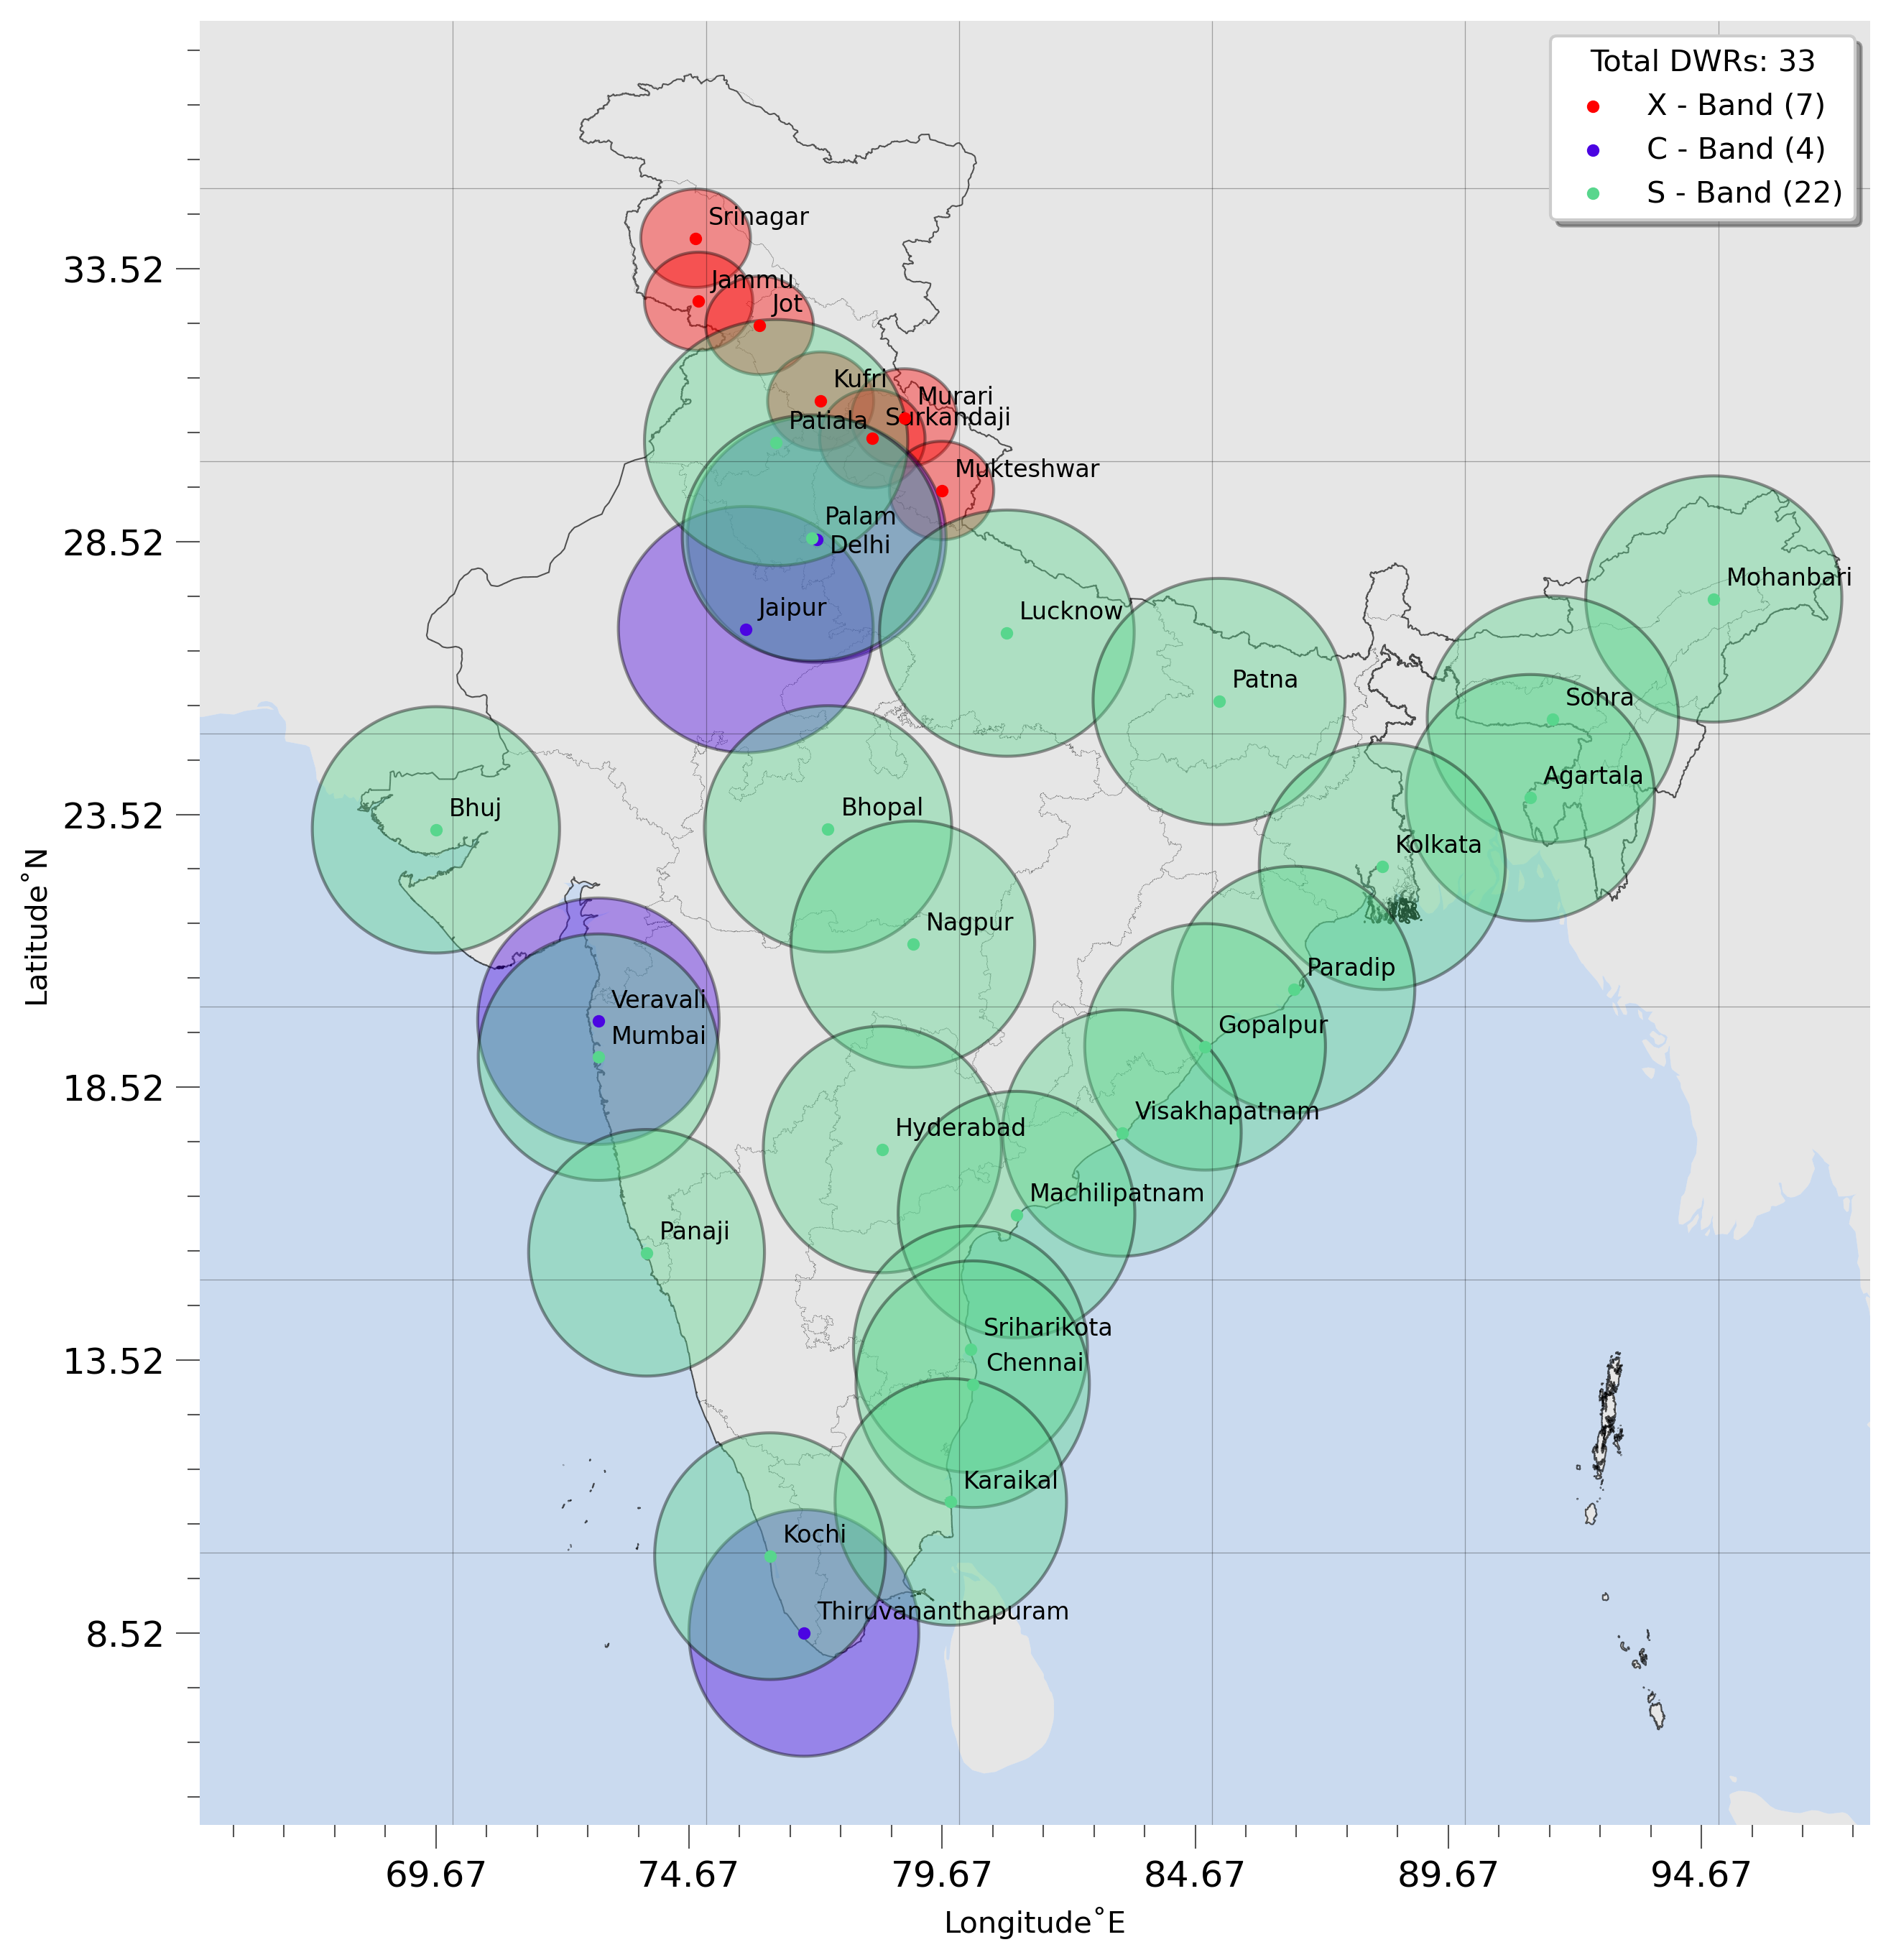

In [10]:
fig = plt.figure(figsize = [10,12], dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(), frameon=False)
BAND = ["X", "C", "S"]
col = ['red', '#4B04E2', '#58D68D']

# Count occurrences of each 'Band' value
band_counts = df['Band'].value_counts().to_dict()

for band, c in zip(BAND, col):
    # Get the count for the current 'Band' value
    count = band_counts[band]
    # Create the label for the legend
    label = f"{band} - Band ({count})"
    df[df['Band']==band].plot.scatter(x='Longitude', y='Latitude', ax=ax, c=c, s=10, label=label, zorder=10)

    ax.add_geometries(gdf[gdf.Band == band].geometry, crs=ccrs.PlateCarree(), 
                      alpha=0.4, edgecolor="k", facecolor=c) 
    
# Add text labels to each point
for i, txt in enumerate(df['Site']):
    x = df['Longitude'][i]
    y = df['Latitude'][i]
    if txt == "Delhi":
        y -= 0.5
    dx = 0.01 * (max(df['Longitude']) - min(df['Longitude']))
    dy = 0.01 * (max(df['Latitude']) - min(df['Latitude']))
    ax.text(x + dx, y + dy, txt, fontsize=8)
india.plot(ax=ax, ec = "k", fc = "none", lw=0.5, alpha = 0.6, )
states.plot(ax=ax, ec ="k", fc = "none", lw=0.2, alpha = 0.5, ls=":")
ax.legend(title = f"Total DWRs: {counts.sum()[0]}", shadow = True)
mf.map_features(ax=ax, ocean=True, borders=False, states=False, land=True)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12, width=0.5, color='#555555', length=8, direction='out')
ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, color='#555555', length=4, direction='out')
ax.set_xticks(np.arange(df.Longitude.min(), df.Longitude.max()+1, 5))
ax.set_yticks(np.arange(df.Latitude.min(), df.Latitude.max()+1, 5))
ax.set_xlabel("Longitude˚E")
ax.set_ylabel("Latitude˚N")
ax.set_extent([65, 98, 5, 37])
ax.set_autoscale_on(True)
plt.show()

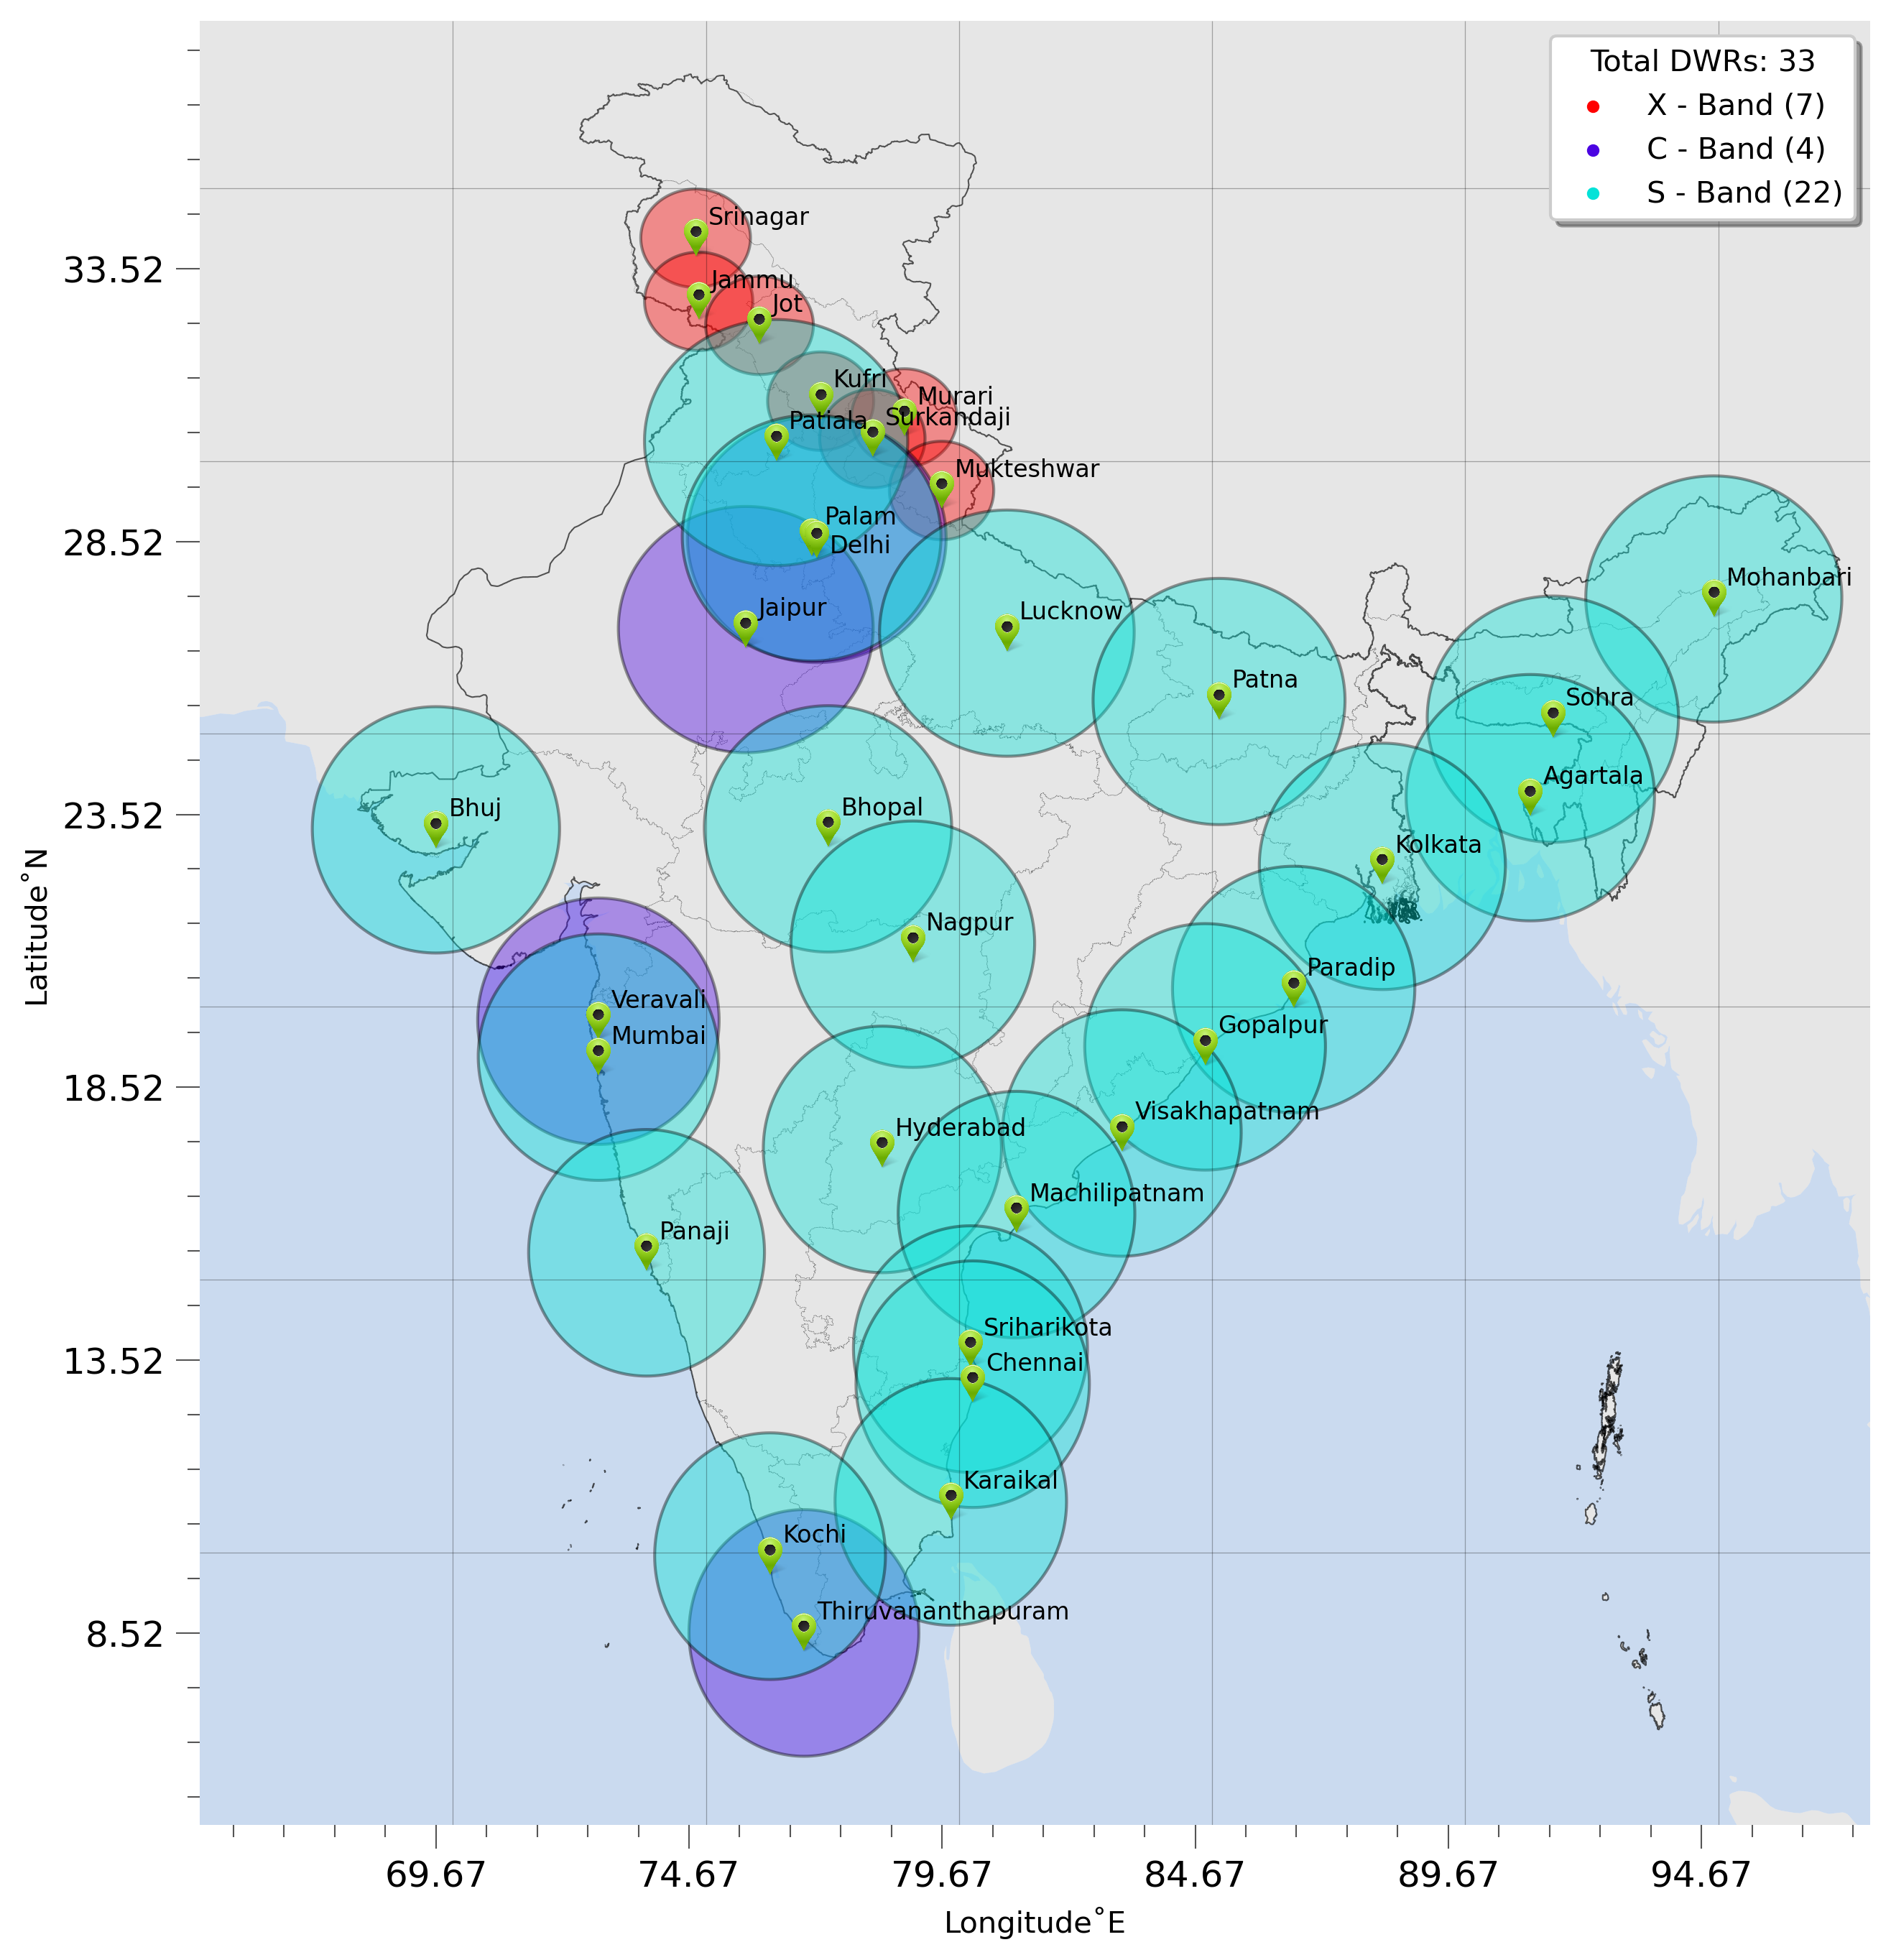

In [11]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import urllib.request
from PIL import Image
import io

url = "https://mausam.imd.gov.in/imd_latest/contents/map-marker-icon-png-green.png"

# Open the URL and read the image data into a bytes object
with urllib.request.urlopen(url) as response:
    img_data = response.read()

# Create a PIL Image object from the image data
ma_img = Image.open(io.BytesIO(img_data))
# Convert the PIL Image to a NumPy array
marker_img = np.array(ma_img)

# Create a function to create an OffsetImage object for each marker
def make_marker(lon, lat):
    # Set the size of the marker image
    size = 0.05

    # Convert the coordinates to the map's coordinate system
    x, y = ax.projection.transform_point(lon, lat, ccrs.PlateCarree())[:2]

    # Create the OffsetImage object
    img = OffsetImage(marker_img, zoom=size)
    img.image.axes = ax
    ab = AnnotationBbox(img, (x,y), frameon=False)
    ax.add_artist(ab)

    
BAND = ["X", "C", "S"]
col = ['red', '#4B04E2', '#04E2D8']

# Create the map figure
fig = plt.figure(figsize=[10, 12], dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(), frameon=False)

# Plot the data points
for band, c in zip(BAND, col):
    count = band_counts[band]
    label = f"{band} - Band ({count})"
    df[df['Band'] == band].plot.scatter(x='Longitude', y='Latitude', 
                                        ax=ax, c=c, s=10, label=label)
    ax.add_geometries(gdf[gdf.Band == band].geometry, crs=ccrs.PlateCarree(), 
                      alpha=0.4, edgecolor="k", facecolor=c)

# Add the custom marker to each data point
for i, row in df.iterrows():
    make_marker(row['Longitude'], row['Latitude'])

# Add text labels to each point
for i, txt in enumerate(df['Site']):
    x = df['Longitude'][i]
    y = df['Latitude'][i]
    if txt == "Delhi":
        y -= 0.5
    dx = 0.01 * (max(df['Longitude']) - min(df['Longitude']))
    dy = 0.01 * (max(df['Latitude']) - min(df['Latitude']))
    ax.text(x + dx, y + dy, txt, fontsize=8)

# Add the map features and labels
india.plot(ax=ax, ec="k", fc="none", lw=0.5, alpha=0.6)
states.plot(ax=ax, ec="k", fc="none", lw=0.2, alpha=0.5, ls=":")
mf.map_features(ax=ax, ocean=True, borders=False, states=False, land=True)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12, width=0.5, 
               color='#555555', length=8, direction='out')
ax.tick_params(axis='both', which='minor', labelsize=10, width=0.5, 
               color='#555555', length=4, direction='out')
ax.set_xticks(np.arange(df.Longitude.min(), df.Longitude.max()+1, 5))
ax.set_yticks(np.arange(df.Latitude.min(), df.Latitude.max()+1, 5))
ax.set_xlabel("Longitude˚E")
ax.set_ylabel("Latitude˚N")
ax.set_extent([65, 98, 5, 37])
ax.set_autoscale_on(True)

# Show the legend and the plot
ax.legend(title=f"Total DWRs: {counts.sum()[0]}", shadow=True)
plt.show()


In [12]:
import ipyleaflet as ipyl
# Create the polygon layer
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
polygons_layer = ipyl.GeoJSON(
    data=gdf.__geo_interface__,
    style={'color': 'gray', 'fillOpacity': 0.2})

In [13]:
import folium
from folium.plugins import MarkerCluster

# Set xlim and ylim
xlim = (df.Longitude.min() - 5, df.Longitude.max() + 3)
ylim = (df.Latitude.min() - 3, df.Latitude.max() + 3)

# Create the folium map object
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5, tiles='openstreetmap',xlim=xlim, ylim=ylim)

# Add markers to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=f"Site: {row['Site']}, Band: {row['Band']}", 
                  icon=folium.Icon(color=row['Band'])).add_to(marker_cluster)

# Add circles to the map
for idx, row in gdf.iterrows():
    if row['Band'] == 'X':
        radius = 100e3
    else:
        radius = 250e3
    folium.Circle(location=[row['geometry'].y, row['geometry'].x],
                  radius=radius,
                  fill=True,
                  fill_opacity=0.2,
                  color='gray').add_to(m)
# Display the map
m